### Analyse digital signal using 1D CNN

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.startml import *
from Starts.startmodtf import *
import matplotlib as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Dropout
from keras.optimizers import SGD
from keras.initializers import random_uniform

data = pd.read_csv('./data/digital_signal.csv', header=None)
data.head()

local_kwargs {'data_path': './data/digital_signal.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


Using TensorFlow backend.


,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,1000,1001,1002
0,1.15,1.76,3.30,0.053353,0.052205,0.055634,0.067048,0.086576,0.111853,0.140554,...,0.306864,0.315905,0.325406,0.335135,0.344773,0.353994,0.362396,0.369342,0.373981,0.375535
1,1.17,1.74,3.40,0.453297,0.427421,0.394495,0.362371,0.334807,0.311793,0.292468,...,-0.041243,-0.046814,-0.051548,-0.055335,-0.058006,-0.059414,-0.059606,-0.058971,-0.058172,-0.057842
2,-1.00,1.83,2.65,-1.587962,-1.641788,-1.704360,-1.750264,-1.760649,-1.726626,-1.647636,...,0.551023,0.550246,0.548295,0.546575,0.545950,0.546594,0.548123,0.549880,0.551216,0.551684
3,1.13,1.80,3.42,0.045770,0.028587,0.012289,0.007296,0.019246,0.047922,0.089389,...,0.274071,0.271366,0.268214,0.264893,0.261571,0.258323,0.255252,0.252612,0.250798,0.250181
4,1.17,1.79,3.47,0.257473,0.247620,0.238914,0.237917,0.248194,0.269635,0.299925,...,0.610546,0.610244,0.609855,0.609638,0.609874,0.610760,0.612257,0.614007,0.615414,0.615925


In [2]:
# replace all rows with values -1 in the first 3 columns (target_values)
data.iloc[:, 0:3].replace(to_replace=-1, value=0, inplace=True)
data[[0,1,2]].head()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1,2
0,1.15,1.76,3.30
1,1.17,1.74,3.40
2,0.00,1.83,2.65
3,1.13,1.80,3.42
4,1.17,1.79,3.47


In [3]:
len(np.unique(data[0])), len(np.unique(data[1])), len(np.unique(data[2]))
target_classes = len(np.unique(data[2]))

In [4]:
stf = StartModTFCNN(n_classes=target_classes, dependent_label=[0,1,2])
stf._get_attributes()

{'activation_fn': 'relu',
 'batch_size': 10,
 'bias_initializer': 'random_uniform',
 'depth_wise_initializer': 'random_uniform',
 'drop_out': 0.2,
 'feature_scl': False,
 'filter_size': 1,
 'hidden_units': [10, 10],
 'input_units': 1,
 'kernel_size': 1,
 'learning_rate': 0.001,
 'loss_fn': 'mean_squared_error',
 'momentum': 0.2,
 'n_filters': 1,
 'n_padding': 1,
 'n_strides': 1,
 'num_epochs': 1,
 'optimizer': 'Adagrad',
 'output_units': 1,
 'rec_drop_out': 0.2,
 'seed': 10,
 'steps': 1000}

In [5]:
stf.info_parameters()


Input_units: 1 

Hidden_units: [10, 10] 

Output_units: 1 

Optimizer: Adagrad 

Activation_function: relu 

Learning_Rate: 0.001 

Training_Steps: 1000 

Batch_Size: 10 

Number_of_epochs: 1 

Feature_Scaling: False 

Loss_function: mean_squared_error 

Drop_out: 0.2 

Recurrent_drop_out: 0.2 

Bias_Initializer: random_uniform 

Depth_wise_Initializer: random_uniform 

Seed: 10 

Kernel_size: 1 

Filter_size: [3, 3] 

n_filters: 1 

n_padding: 1 

n_strides: 1 

momentum: 0.2 



In [6]:
# Update parameters 
new_param={'input_units': 1000, 'hidden_units': [1000, 500, 250], 'output_units': 3, 'optimizer':'Adam', 
           'activation_fn': 'relu', 'learning_rate': 0.0025,
           'steps': 5000, 'batch_size': 10, 'num_epochs': 20, 'feature_scl': True, 
           'loss_fn': 'mean_squared_error', 'drop_out': 0.2, 'rec_drop_out': 0.6,
           'bias_initializer': 'random_uniform', 'depth_wise_initializer': 'random_uniform', 'seed': 10, 
           'kernel_size': 1, 'filter_size': 1, 'momentum': 0.2, 'n_filters': 32, 'n_padding': 1, 'n_strides': 1}

stf.update_parameters=new_param
stf.info_parameters()


Input_units: 1000 

Hidden_units: [1000, 500, 250] 

Output_units: 3 

Optimizer: Adam 

Activation_function: relu 

Learning_Rate: 0.0025 

Training_Steps: 5000 

Batch_Size: 10 

Number_of_epochs: 20 

Feature_Scaling: True 

Loss_function: mean_squared_error 

Drop_out: 0.2 

Recurrent_drop_out: 0.6 

Bias_Initializer: random_uniform 

Depth_wise_Initializer: random_uniform 

Seed: 10 

Kernel_size: 1 

Filter_size: 1 

n_filters: 32 

n_padding: 1 

n_strides: 1 

momentum: 0.2 



In [7]:
# the first 3 columns 0, 1, 2 are chosen as target_labels
# Build and evaluate model
model, y_eval, y_pred = stf.keras_cnn_1d(data)
model

Epoch 1/20
115/115 [==============================] - 5s 43ms/step - loss: 4.5029 - acc: 0.7217
Epoch 2/20
115/115 [==============================] - 5s 45ms/step - loss: 3.1461 - acc: 0.8087
Epoch 3/20
115/115 [==============================] - 6s 52ms/step - loss: 1.1490 - acc: 0.8087
Epoch 4/20
115/115 [==============================] - 5s 41ms/step - loss: 1.0803 - acc: 0.8087
Epoch 5/20
115/115 [==============================] - 6s 51ms/step - loss: 1.0415 - acc: 0.8087
Epoch 6/20
115/115 [==============================] - 4s 37ms/step - loss: 1.0502 - acc: 0.8087
Epoch 7/20
115/115 [==============================] - 5s 40ms/step - loss: 1.0341 - acc: 0.8087
Epoch 8/20
115/115 [==============================] - 4s 37ms/step - loss: 1.0206 - acc: 0.8087
Epoch 9/20
115/115 [==============================] - 4s 34ms/step - loss: 1.0190 - acc: 0.8087
Epoch 10/20
115/115 [==============================] - 4s 34ms/step - loss: 1.0391 - acc: 0.8087
Epoch 11/20
115/115 [==================

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1000, 32)          64        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 32)          1056      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              32001000  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
__________

In [9]:
# Reset index of y_eval
StartML.idx_reset(y_eval)
y_eval.head()

,0,1,2
0,1.32,2.07,3.67
1,1.03,2.18,4.60
2,1.22,1.83,3.45
3,1.35,1.90,3.46
4,1.00,1.73,3.23


In [10]:
y_pred.head()

,0,1,2
0,0.603557,1.494963,3.059283
1,0.478673,1.183464,2.425808
2,0.528922,1.303961,2.671909
3,0.616293,1.514707,3.108151
4,0.562867,1.390464,2.858161


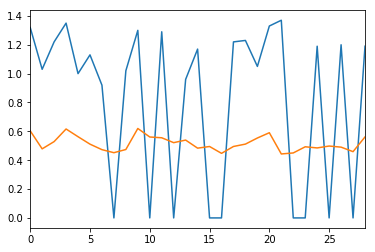

In [11]:
# compare the plot between first reponse of the predicted value and true value
y_eval[0].plot()
y_pred[0].plot()

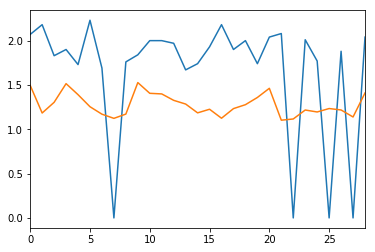

In [12]:
# compare the plot between second reponse of the predicted value and true value
y_eval[1].plot()
y_pred[1].plot()

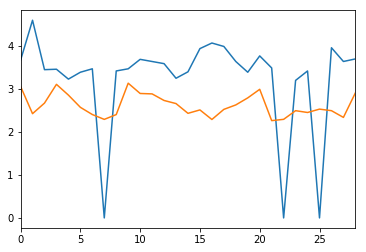

In [13]:
# compare the plot between third reponse of the predicted value and true value
y_eval[2].plot()
y_pred[2].plot()